In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
IMG_SIZE = 100

column_name = [
    'Container Ship',
    'Bulk Carrier',
    'Passengers Ship',
    'Ro-ro/passenger Ship',
    'Ro-ro Cargo',
    'Tug',
    'Vehicles Carrier',
    'Reefer',
    'Yacht',
    'Sailing Vessel',
    'Heavy Load Carrier',
    'Wood Chips Carrier',
    'Livestock Carrier',
    'Fire Fighting Vessel',
    'Patrol Vessel',
    'Platform',
    'Standby Safety Vessel',
    'Combat Vessel',
    'Training Ship',
    'Icebreaker',
    'Replenishment Vessel',
    'Tankers',
    'Fishing Vessels',
    'Supply Vessels',
    'Carrier/Floating',
    'Dredgers'
]

In [4]:
def getTrainData(img_size):
    img_dim = (img_size,img_size)

    train_csv = pd.read_csv('C:/Users/NCC/Desktop/thesis/dataset/marvel2016/1_all/marvel_train.csv')
    train_arr_imgs = [img_to_array(load_img('C:/Users/NCC/Desktop/thesis/dataset/marvel2016/1_all/Wall/'+str(img)+'.jpg', target_size=img_dim)) for img in train_csv.image]
    x_train = np.array(train_arr_imgs)

    train_cat = train_csv['category'].values
    y_train = to_categorical(train_cat-1)

    return x_train, y_train

def getTestData(img_size):
    img_dim = (img_size,img_size)

    test_csv = pd.read_csv('C:/Users/NCC/Desktop/thesis/dataset/marvel2016/1_all/marvel_test.csv')
    #test_arr_imgs = [img_to_array(load_img('test/'+img, target_size=img_dim)) for img in test_csv.image]
    test_arr_imgs = []
    for img in test_csv.image:
        img_array = img_to_array(load_img('C:/Users/NCC/Desktop/thesis/dataset/marvel2016/1_all/Wall/'+str(img)+'.jpg', target_size=img_dim))
        img_array = img_array/255.0
        test_arr_imgs.append(img_array)
    x_test = np.array(test_arr_imgs)

    test_cat = test_csv.category
    test_cv_y = test_cat-1
    y_test = np.array(test_cv_y)
    return x_test, y_test

In [5]:
def augData(x_train, y_train, batch_size):
    seed = 42
    random.seed = seed
    np.random.seed(seed=seed)
    #train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=False, fill_mode='nearest')
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size, seed=seed)
    return train_generator

In [6]:
from keras import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications import InceptionV3

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)
base_model.trainable = False

model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024,activation='relu'),
  Dropout(rate=0.5),
  Dense(1024,activation='relu'),
  Dropout(rate=0.5),
  Dense(len(column_name), activation='softmax')
])
model.summary()

87916544/87910968 [==============================] - 8s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [8]:
batch_size = 64
x_train, y_train = getTrainData(IMG_SIZE)
train_generator = augData(x_train, y_train, batch_size)

In [9]:
import time
startTime = time.time()

history = model.fit_generator(train_generator,
                              steps_per_epoch=len(x_train) // batch_size,
                              epochs=10)
endTime = time.time()

C:\Users\NCC\anaconda3\envs\env-11\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1824/1824 [==============================] - 129s 64ms/step - loss: 2.6380 - accuracy: 0.2374
Epoch 2/10
1824/1824 [==============================] - 104s 57ms/step - loss: 2.3438 - accuracy: 0.3110
Epoch 3/10
1824/1824 [==============================] - 95s 52ms/step - loss: 2.2995 - accuracy: 0.3250
Epoch 4/10
1824/1824 [==============================] - 94s 51ms/step - loss: 2.2681 - accuracy: 0.3347
Epoch 5/10
1824/1824 [==============================] - 95s 52ms/step - loss: 2.2422 - accuracy: 0.34050s - los
Epoch 6/10
1824/1824 [==============================] - 93s 51ms/step - loss: 2.2354 - accuracy: 0.34520s - loss: 2
Epoch 7/10
1824/1824 [==============================] - 94s 51ms/step - loss: 2.2238 - accuracy: 0.3473
Epoch 8/10
1824/1824 [==============================] - 97s 53ms/step - loss: 2.2036 - accuracy: 0.3508
Epoch 9/10
1824/1824 [==============================] - 95s 52ms/step - loss: 2.1875 - accuracy: 0.3537
Epoch 10/10
1824/1824 [===================

In [10]:
name = 'InceptionV3_R8-e10_Dropout_NoAug'
model_name = 'InceptionV3'

In [11]:
def saveH5(model,name):
    model.save_weights(name+'_model-save-wieghts.h5')
    model.save(name+'_model-save.h5')
saveH5(model,name)

In [12]:
def saveHistory(history, name):
    hist_df = pd.DataFrame(history.history) 
    hist_json_file = name+'_history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)
    hist_csv_file = name+'_history.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
saveHistory(history,name)

In [13]:
def printTime(startTime, endTime):
    print("Strat time = "+str(startTime))
    print("End time = "+str(endTime))
    print("Use time = "+str(endTime-startTime))
printTime(startTime, endTime)

Strat time = 1610519218.6526153
End time = 1610520216.411856
Use time = 997.7592406272888


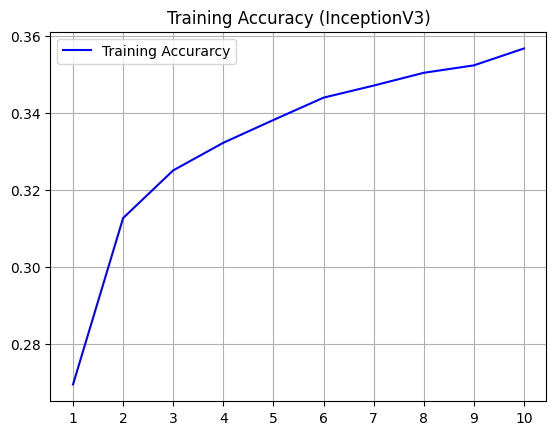

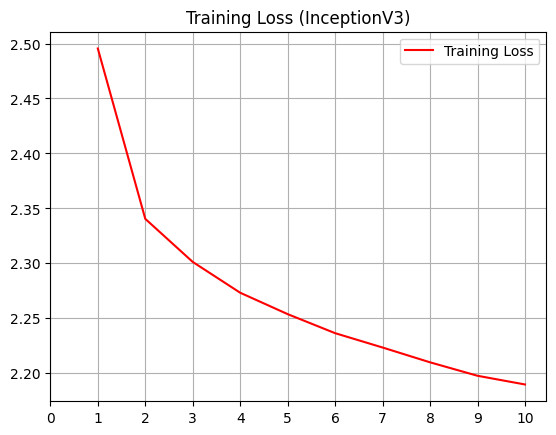

In [14]:
def plotAccuracyLoss(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(1, len(acc) + 1)

    #Train and validation accuracy
    plt.style.use('default')
    plt.grid(True)
    plt.xticks(np.arange(0, len(acc)+1, 1.0))
    #plt.yticks(np.arange(0, 1))
    plt.plot(epochs, acc, 'b', label='Training Accurarcy')
    plt.title('Training Accuracy ('+model_name+')')
    plt.legend()
    plt.grid(True)
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.grid(True)
    plt.xticks(np.arange(0, len(acc)+1, 1.0))
    plt.title('Training Loss ('+model_name+')')
    plt.legend()
    plt.show()
plotAccuracyLoss(history)

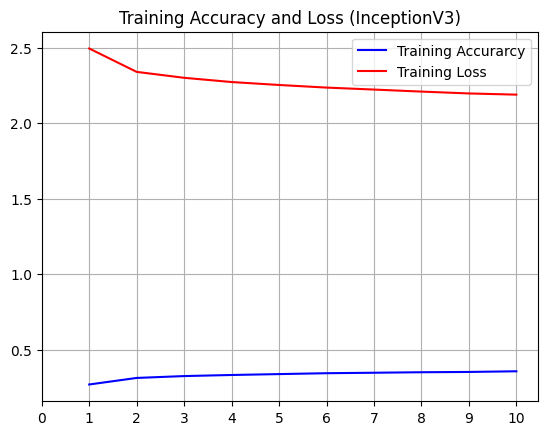

In [15]:
def plotBothAccuracyLoss(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(1, len(acc) + 1)

    #Train and validation accuracy
    plt.style.use('default')
    plt.grid(True)
    plt.xticks(np.arange(0, len(acc)+1, 1.0))
    #plt.yticks(np.arange(0, 1))
    plt.plot(epochs, acc, 'b', label='Training Accurarcy')
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.grid(True)
    plt.xticks(np.arange(0, len(acc)+1, 1.0))
    plt.title('Training Accuracy and Loss ('+model_name+')')
    plt.legend()
    plt.show()
plotBothAccuracyLoss(history)

In [16]:
x_test, y_test = getTestData(IMG_SIZE)

In [17]:
y_pred = model.predict(x_test)

In [18]:
def convertPred1D(y_pred):
    get_argmax = []
    for i in range(len(y_pred)):
        get_argmax.append(np.argmax(y_pred[i]))
    return get_argmax
y_pred1d = convertPred1D(y_pred)

In [19]:
def savePrediction(pred, name):
    test_csv = pd.read_csv('C:/Users/NCC/Desktop/thesis/dataset/marvel2016/1_all/marvel_test.csv')
    test_dict = {'image': test_csv.image, 'y_true': test_csv.category-1, 'y_pred': pred}
    df_pred = pd.DataFrame(test_dict)
    export_pred = df_pred.to_csv(r''+name+'_y-prediction.csv', index = None, header=True)
savePrediction(y_pred1d, name)

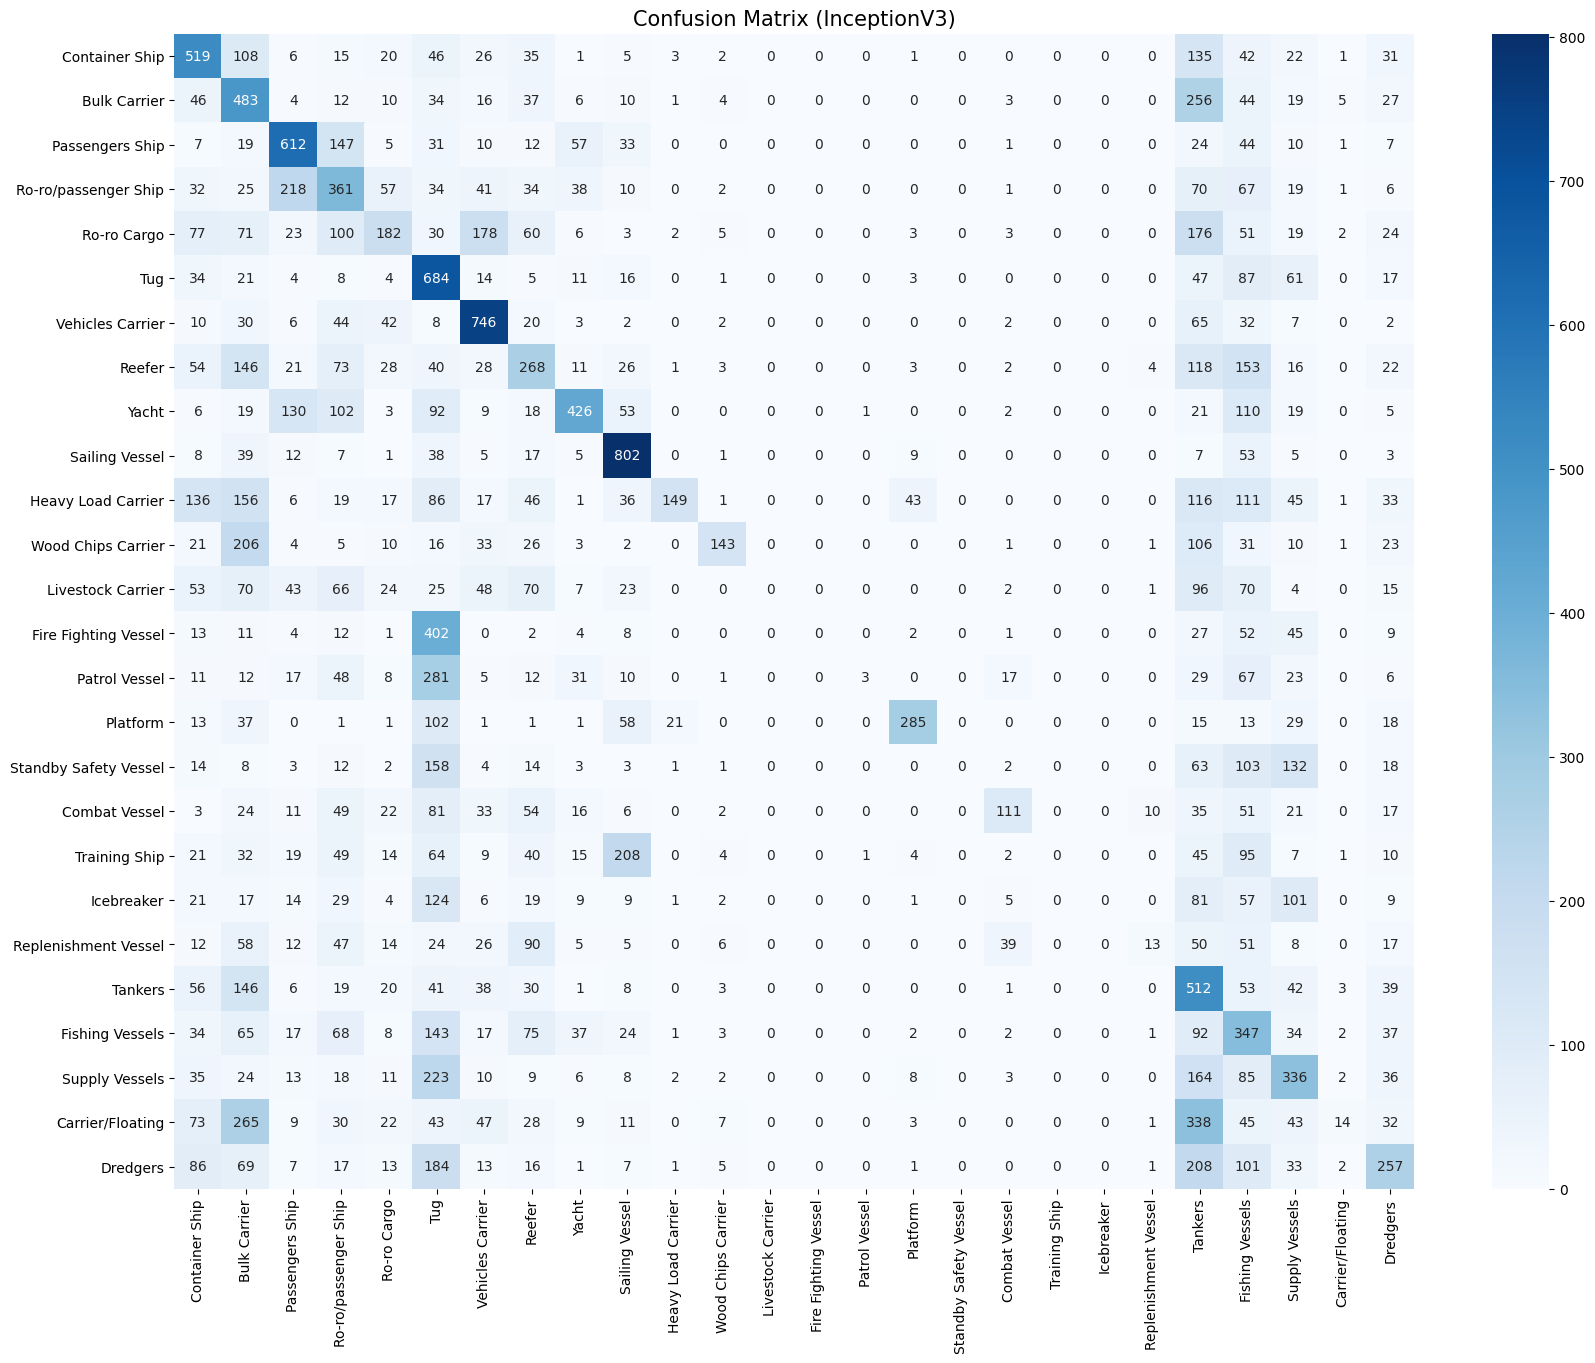

In [20]:
def plotConfusionMatrix(array, name):
    df_cm = pd.DataFrame(array, index = column_name, columns = column_name)
    plt.figure(figsize=(20,15))
    sn.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')
    plt.title('Confusion Matrix ('+name+')',fontsize = 15)
    plt.show()
plotConfusionMatrix(confusion_matrix(y_test, y_pred1d),model_name)

In [21]:
confusion_matrix(y_test, y_pred1d)

array([[519, 108,   6,  15,  20,  46,  26,  35,   1,   5,   3,   2,   0,
          0,   0,   1,   0,   0,   0,   0,   0, 135,  42,  22,   1,  31],
       [ 46, 483,   4,  12,  10,  34,  16,  37,   6,  10,   1,   4,   0,
          0,   0,   0,   0,   3,   0,   0,   0, 256,  44,  19,   5,  27],
       [  7,  19, 612, 147,   5,  31,  10,  12,  57,  33,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,  24,  44,  10,   1,   7],
       [ 32,  25, 218, 361,  57,  34,  41,  34,  38,  10,   0,   2,   0,
          0,   0,   0,   0,   1,   0,   0,   0,  70,  67,  19,   1,   6],
       [ 77,  71,  23, 100, 182,  30, 178,  60,   6,   3,   2,   5,   0,
          0,   0,   3,   0,   3,   0,   0,   0, 176,  51,  19,   2,  24],
       [ 34,  21,   4,   8,   4, 684,  14,   5,  11,  16,   0,   1,   0,
          0,   0,   3,   0,   0,   0,   0,   0,  47,  87,  61,   0,  17],
       [ 10,  30,   6,  44,  42,   8, 746,  20,   3,   2,   0,   2,   0,
          0,   0,   0,   0,   2,   0,   0,   

In [22]:
def printReport(y_test, y_pred, name):
    print(classification_report(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    df_rp = pd.DataFrame(report).transpose()
    export_rp = df_rp.to_csv(r''+name+'_cls-report.csv', index = None, header=True)
printReport(y_test, y_pred1d, name)

              precision    recall  f1-score   support

           0       0.37      0.51      0.43      1018
           1       0.22      0.47      0.30      1017
           2       0.50      0.60      0.55      1020
           3       0.27      0.36      0.30      1016
           4       0.34      0.18      0.23      1015
           5       0.23      0.67      0.34      1017
           6       0.54      0.73      0.62      1021
           7       0.26      0.26      0.26      1017
           8       0.60      0.42      0.49      1016
           9       0.58      0.79      0.67      1012
          10       0.81      0.15      0.25      1019
          11       0.71      0.22      0.34       642
          12       0.00      0.00      0.00       617
          13       0.00      0.00      0.00       593
          14       0.60      0.01      0.01       581
          15       0.77      0.48      0.59       596
          16       0.00      0.00      0.00       541
          17       0.56    

C:\Users\NCC\anaconda3\envs\env-11\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NCC\anaconda3\envs\env-11\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NCC\anaconda3\envs\env-11\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NCC\anaconda3\en